# 선형 회귀 (Linear Regression)

## Loading the Housing dataset into a data frame

Attributes:
    
<pre>
1. CRIM      도시별 인구 당 범죄 발생 건수
2. AN        25,000 ft^2 이상의 주택 면적의 비용
3. INDUS     마을 당 비소매 영업 비율
4. CHAS      찰스강이 근방에 있는가에 대한 더미 변수 (1이면 근처, 0이면 아님)
5. NOX       산화 질소 농도
6. RM        주거당 평균 객실 수
7. AGE       1940년 이전에 건설된 건물 중 소유자가 거주하는 비율
8. DIS       보스턴 5개 직장 구역과의 가중 거리
9. RAD       방사형 고속도로 접근 가능 지수
10. TAX      $10,000 자산 당 세금 비율
11. PTRATIO  도시별 학생-선생님 비율
12. B        1000(Bk - 0.63)^2, Bk:흑인 비율
13. LSTAT    % lower status of the population
14. MEDV     소유자가 거주하는 주택의 중앙값 (단위 $1000)
</pre>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/housing2.csv')

df.head()

,CRIM,AN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


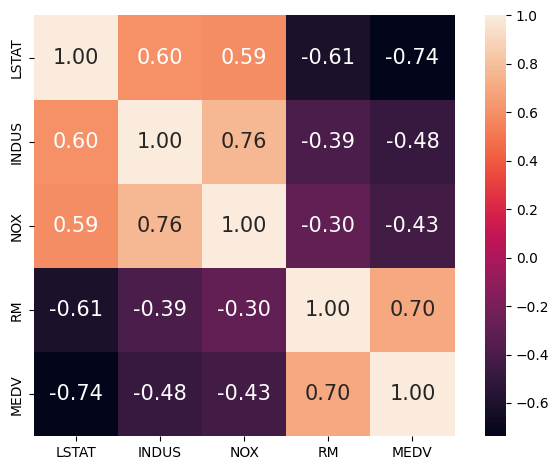

In [10]:
import matplotlib.pyplot as plt
#seaborn : 통계 데이터 시각화 도구
import seaborn as sns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True, # colorbar
                 annot=True, # 숫자 표시
                 square=True, # 정사각형
                 fmt='.2f', # 숫자 소수 둘째자리까지 표시
                 annot_kws={'size': 15}, # 숫자 크기
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

### data_x로 data_y를 예측하는 선형회귀 모델을 만들어보자.

In [11]:
data_x = df.drop(['MEDV','CRIM','INDUS','CHAS','NOX','AGE','RAD','LSTAT','B'],axis=1)
data_x

,AN,RM,DIS,TAX,PTRATIO
0,18.0,6.575,4.0900,296,15.3
1,0.0,6.421,4.9671,242,17.8
2,0.0,7.185,4.9671,242,17.8
3,0.0,6.998,6.0622,222,18.7
4,0.0,7.147,6.0622,222,18.7
...,...,...,...,...,...
501,0.0,6.593,2.4786,273,21.0
502,0.0,6.120,2.2875,273,21.0
503,0.0,6.976,2.1675,273,21.0
504,0.0,6.794,2.3889,273,21.0


In [21]:
data_x['intercept']=pd.Series([1]*len(data_x))
# =1의 느낌으로 1추가 (절편)

In [23]:
data_x

,AN,RM,DIS,TAX,PTRATIO,intercept
0,18.0,6.575,4.0900,296,15.3,1
1,0.0,6.421,4.9671,242,17.8,1
2,0.0,7.185,4.9671,242,17.8,1
3,0.0,6.998,6.0622,222,18.7,1
4,0.0,7.147,6.0622,222,18.7,1
...,...,...,...,...,...,...
501,0.0,6.593,2.4786,273,21.0,1
502,0.0,6.120,2.2875,273,21.0,1
503,0.0,6.976,2.1675,273,21.0,1
504,0.0,6.794,2.3889,273,21.0,1


In [24]:
data_y = df['MEDV']
data_y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

## 방법 1. 
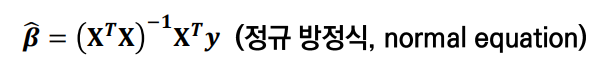

In [25]:
x = data_x.to_numpy()

In [26]:
xtx = np.matmul(x.T , x) #행렬곱 x^T * x

In [27]:
xtx_inv = np.linalg.inv(xtx) # 역행렬

In [28]:
np.matmul(np.matmul(xtx_inv , x.T), data_y)

array([ 0.04701306,  7.13637701, -0.51344922, -0.01377877, -0.757204  ,
       -1.30278214])

## 방법 2. Scikit_learn 활용

In [29]:
from sklearn.linear_model import LinearRegression

In [46]:
slr = LinearRegression()
lr_x=data_x[['AN','RM','DIS','TAX','PTRATIO']]
slr.fit(lr_x, data_y)
y_pred = slr.predict(lr_x)

In [47]:
slr.coef_

array([ 0.04701306,  7.13637701, -0.51344922, -0.01377877, -0.757204  ])

In [49]:
slr.intercept_

-1.3027821371022092

# 로지스틱 회귀 (Logistic Regression)

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
social_N_data = pd.read_csv('data/Social_Network_Ads.csv')
social_N_data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<Axes: xlabel='Purchased', ylabel='count'>

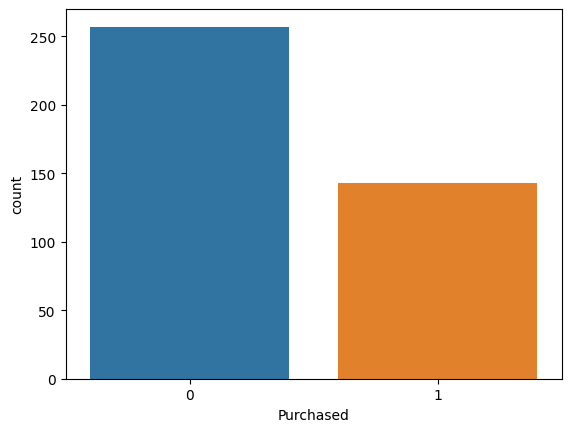

In [66]:
import seaborn as sns
sns.countplot(x='Purchased', data=social_N_data)

<Axes: xlabel='Purchased', ylabel='count'>

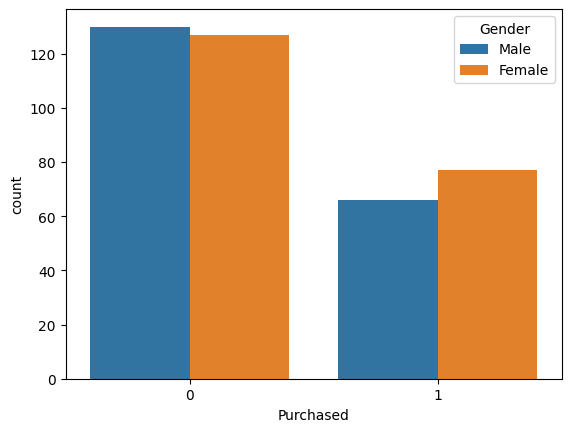

In [67]:
sns.countplot(x='Purchased', hue='Gender', data=social_N_data)

## 1. 데이터 전처리 - 더미 변수 

In [68]:
social_N_data.drop('User ID', axis=1, inplace=True)

In [69]:
gender = pd.get_dummies(social_N_data['Gender'], drop_first=True)
social_N_data.drop('Gender',axis=1,inplace=True)
social_N_data = pd.concat([social_N_data,gender], axis=1) # axis=1 열의 방향으로 붙이기

In [70]:
social_N_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


## 2. 독립변수 (X) 와 종속변수 (Y)로 분리

In [71]:
X=social_N_data[['Age','EstimatedSalary','Male']]
Y=social_N_data[['Purchased']]

In [72]:
X

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [73]:
Y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


## 3. Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()#정규화 (x-평균) / 표준편차
X = sc.fit_transform(X)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

## 4. Train / Test Split

In [76]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(280, 3)
(120, 3)
(280, 1)
(120, 1)


## 5. 모델 학습

In [97]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train.values.flatten()) # flatten으로 차원을 낮춤(280*1) -> (280)(에러 방지)

LogisticRegression()

In [98]:
y_pred = classifier.predict(X_test)

In [99]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [96]:
result = pd.DataFrame({'Actual' : y_test.values.flatten(), 'Predicted' : y_pred})
result

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
115,0,0
116,0,0
117,0,0
118,0,0


In [101]:
classifier.coef_

array([[2.36839196, 1.42929561, 0.20973787]])

In [102]:
classifier.intercept_

array([-1.1352347])

## 6. 모델 평가

In [111]:
print(classifier.predict_proba(X_test)) #모델의 분류 확률 출력

[[9.44682663e-01 5.53173368e-02]
 [8.02737918e-01 1.97262082e-01]
 [3.25243566e-01 6.74756434e-01]
 [1.71320233e-01 8.28679767e-01]
 [8.75654484e-01 1.24345516e-01]
 [8.11811394e-01 1.88188606e-01]
 [9.98831435e-01 1.16856490e-03]
 [7.91917601e-02 9.20808240e-01]
 [9.90032335e-01 9.96766502e-03]
 [1.20132132e-02 9.87986787e-01]
 [8.88238787e-01 1.11761213e-01]
 [7.10917103e-01 2.89082897e-01]
 [8.06449663e-01 1.93550337e-01]
 [2.73743742e-02 9.72625626e-01]
 [6.63057390e-02 9.33694261e-01]
 [2.77702574e-03 9.97222974e-01]
 [9.10404254e-03 9.90895957e-01]
 [9.78634880e-01 2.13651200e-02]
 [9.42707444e-01 5.72925556e-02]
 [4.12177478e-03 9.95878225e-01]
 [6.43293485e-01 3.56706515e-01]
 [9.81402566e-02 9.01859743e-01]
 [4.73667135e-02 9.52633286e-01]
 [4.82435803e-01 5.17564197e-01]
 [7.49443667e-01 2.50556333e-01]
 [9.97143698e-01 2.85630212e-03]
 [9.05491546e-02 9.09450845e-01]
 [1.38976895e-01 8.61023105e-01]
 [3.47451206e-01 6.52548794e-01]
 [2.27154178e-02 9.77284582e-01]
 [8.558678

Text(0.5, 23.52222222222222, 'Predicted label')

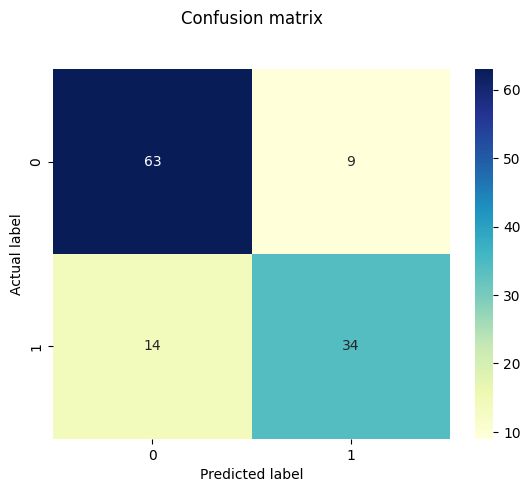

In [112]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 
# 실제값과 예측값이 맞는지 매트릭스로 표현 한 것